In [99]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [100]:
# Load MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'Train shape = {x_train.shape}')
print(f'Test shape = {x_test.shape}')

Train shape = (60000, 28, 28)
Test shape = (10000, 28, 28)


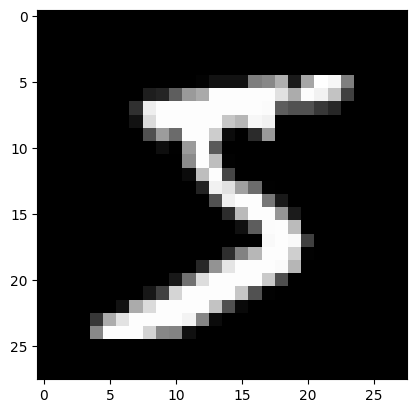

In [101]:
plt.imshow(x_train[0], cmap='gray')

In [102]:
# Normalize to 0 - 1 range (so the NN can learn better)
# Divide by 255 because pixel values range from 0 to 255

x_train = x_train / 255.0
x_test = x_test / 255.0

In [103]:
# Manual flatten

x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

print(x_test_flatten.shape)

(10000, 784)


In [104]:
'''
Splitting
Train 60k | Test 10k
-> Train 48k | Val 12k | Test 10k
'''

x_train_flatten, x_val_flatten, y_train, y_val = train_test_split(x_train_flatten, y_train, test_size=0.2, random_state=2)

print(f'Train = {x_train_flatten.shape[0]} | Val = {x_val_flatten.shape[0]}') 

print(f'Y values = {np.unique(y_test)} | shape = {np.unique(y_test).shape[0]}')

Train = 48000 | Val = 12000
Y values = [0 1 2 3 4 5 6 7 8 9] | shape = 10


In [105]:
# Model

input_shape = x_train_flatten.shape[1]
n_classes = np.unique(y_test).shape[0]

print(f'Input shape = {input_shape} | output shape = {n_classes}')

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_classes, activation='linear')
])

learning_rate = 0.001
epochs = 20

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train_flatten, y_train, validation_data=(x_val_flatten, y_val), epochs=epochs)

Input shape = 784 | output shape = 10
Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3270 - accuracy: 0.9045 - val_loss: 0.1802 - val_accuracy: 0.9458
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1565 - accuracy: 0.9538 - val_loss: 0.1258 - val_accuracy: 0.9618
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1160 - accuracy: 0.9653 - val_loss: 0.1033 - val_accuracy: 0.9694
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0948 - accuracy: 0.9709 - val_loss: 0.0982 - val_accuracy: 0.9704
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0816 - accuracy: 0.9747 - val_loss: 0.0862 - val_accuracy: 0.9745
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0686 - accuracy: 0.9784 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0598 - accuracy: 0.9

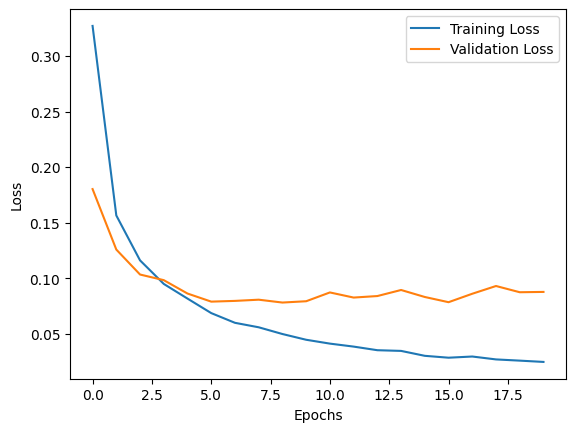

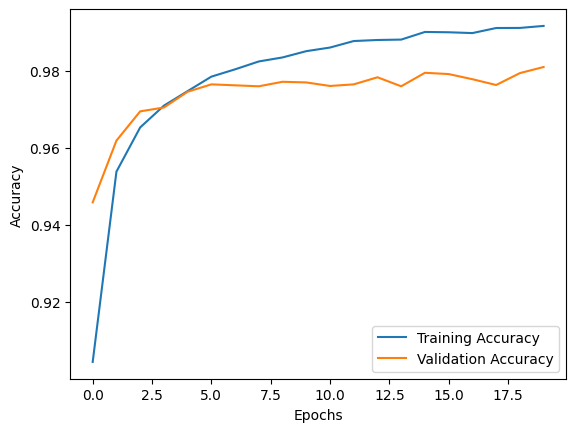

In [106]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9809
Model evaluation: [0.07789908349514008, 0.98089998960495]
313/313 [==============================] - 0s 1ms/step


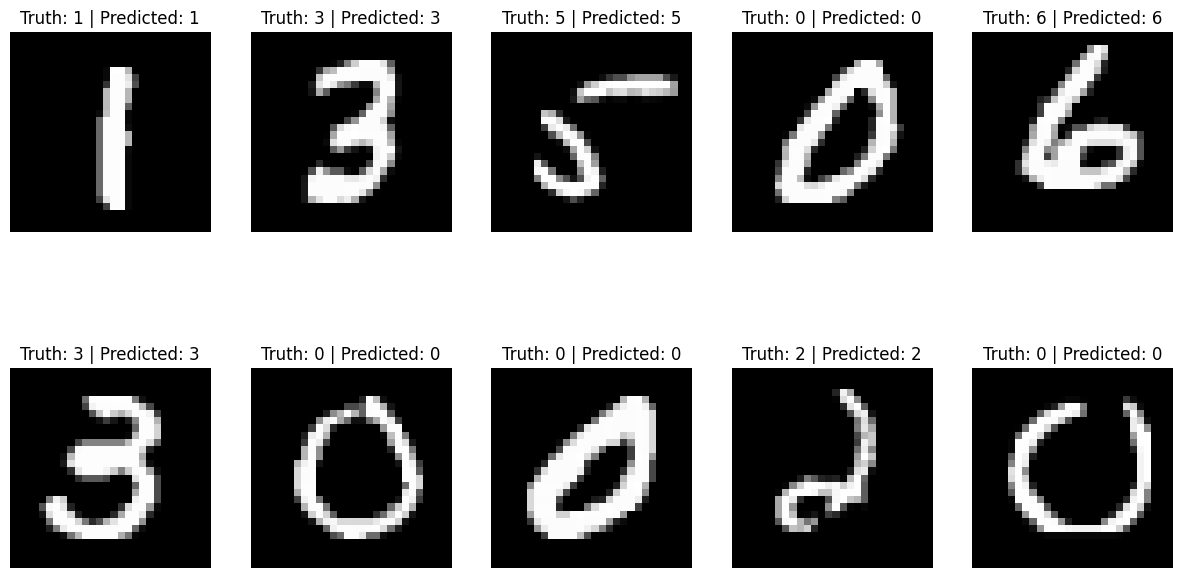

In [121]:
# Evaluate model

print(f'Model evaluation: {model.evaluate(x_test_flatten, y_test)}')

n_predict = 10

predict_idxs = np.random.randint(0, x_test_flatten.shape[0], size=n_predict)
y_pred_test = np.argmax(model.predict(x_test_flatten), axis=1)

y_pred_random = y_pred_test[predict_idxs]

plt.figure(figsize=(15, 8)) 

for idx, y_pred in enumerate(y_pred_random):
    
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_test_flatten[predict_idxs[idx]].reshape(28, 28), cmap='gray') # Original image shape: (28, 28)
    plt.title(f'Truth: {y_test[predict_idxs[idx]]} | Predicted: {y_pred}')
    plt.axis('off')

plt.show()

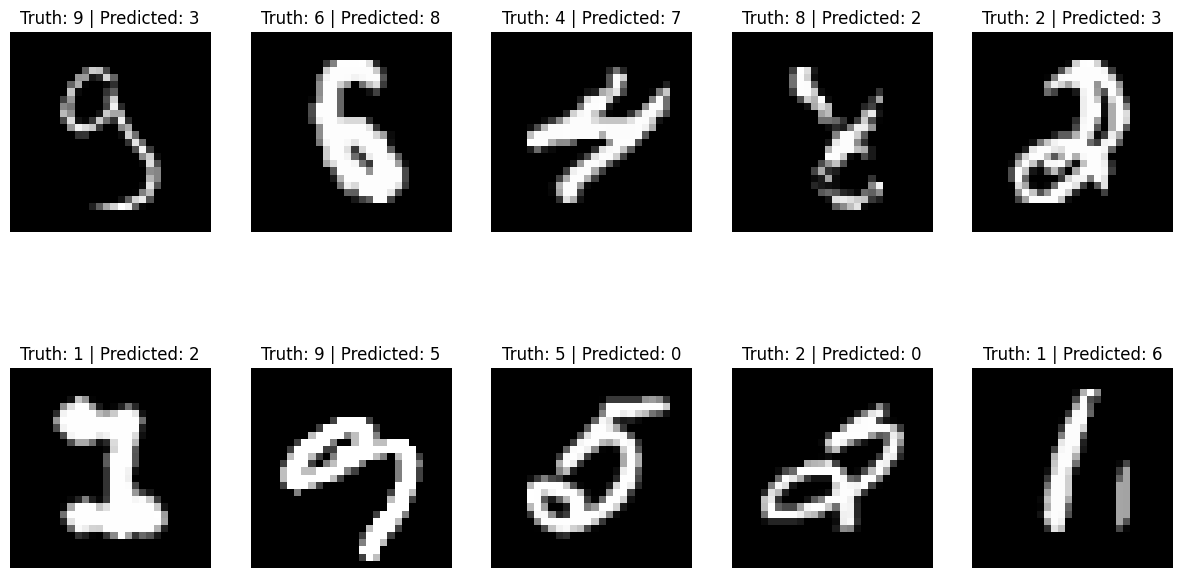

In [122]:
# Check misclassified

miss_idxs = np.where(y_test != y_pred_test)[0]
random_miss_idxs = np.random.choice(miss_idxs, size=n_predict)
plt.figure(figsize=(15, 8)) 

for idx, miss_idx in enumerate(random_miss_idxs):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_test_flatten[miss_idx].reshape(28, 28), cmap='gray') # Original image shape: (28, 28)
    plt.title(f'Truth: {y_test[miss_idx]} | Predicted: {y_pred_test[miss_idx]}')
    plt.axis('off')

plt.show()